<a href="https://colab.research.google.com/github/anaisaoviedo-upb/Optimizacion-de-modelos/blob/main/Optimizacion_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimización de modelos**

**Métodos basados en mallas:**

Búsqueda en Cuadrícula (Grid Search): se especifica un conjunto predefinido de valores para cada hiperparámetro que se desea ajustar.

Búsqueda Aleatoria (Random Search): En lugar de probar todas las combinaciones posibles como en la búsqueda en cuadrícula, se buscan combinaciones aleatorias.

**Métodos probabilísticos:**

Optimización Bayesiana: Utiliza métodos de optimización bayesiana para encontrar de manera eficiente las mejores configuraciones de hiperparámetros  ("Bayesian Optimization" y "Optuna“)

**Métodos de aprendizaje basado en poblaciones:**

Optimización Evolutiva: Se inspira en conceptos de la evolución biológica.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Cargamos los datos
data = pd.read_csv("videojuegos.csv")
data.head()


,videojuego,Edad,Sexo,Plataforma,Consumidor_habitual,Presupuesto para invertir
0,'Mass Effect',29,Mujer,PC,True,200
1,'Sim City',27,Mujer,Otros,True,600
2,'Dead Space',22,Hombre,'Xbox',False,200
3,'Battlefield',28,Mujer,'Xbox',True,370
4,'KOA: Reckoning',30,Mujer,PC,True,100


In [ ]:
#Hacer profiling de los datos


In [ ]:
#Creamos variables dummy para convertir  las categorías a números
data = pd.get_dummies(data, columns=['videojuego', 'Plataforma'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['Sexo', 'Consumidor_habitual'], drop_first=True, dtype=int)
data.head()

,Edad,Presupuesto para invertir,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC,Sexo_Mujer,Consumidor_habitual_True
0,29,200,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,27,600,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,22,200,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,28,370,1,0,0,0,0,0,0,0,0,1,0,0,1,1
4,30,100,0,0,0,0,0,1,0,0,0,0,0,1,1,1


<Axes: >

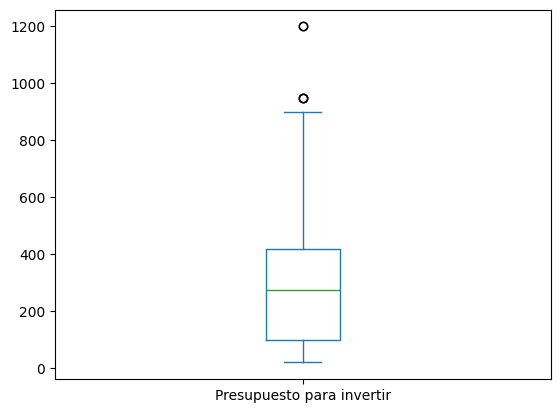

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Presupuesto para invertir", axis = 1) # Variables predictoras
Y = data['Presupuesto para invertir'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
Y_train.plot(kind='box')

In [ ]:
#Dataframe para comparar los resultados
from sklearn import metrics
medidas= pd.DataFrame(index=['mse','rmse','mae','mape','max'])

In [ ]:
# Configuración manual de un modelo RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=50, min_samples_leaf=2, max_samples=0.7, random_state=42)
model.fit(X_train, Y_train)


RandomForestRegressor(max_depth=50, max_samples=0.7, min_samples_leaf=2,
                      random_state=42)

      Random Forest
mse    13764.015446
rmse     117.320141
mae       80.686192
mape       0.637423
max      370.528452


<ipython-input-8-cd805d672e6e>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


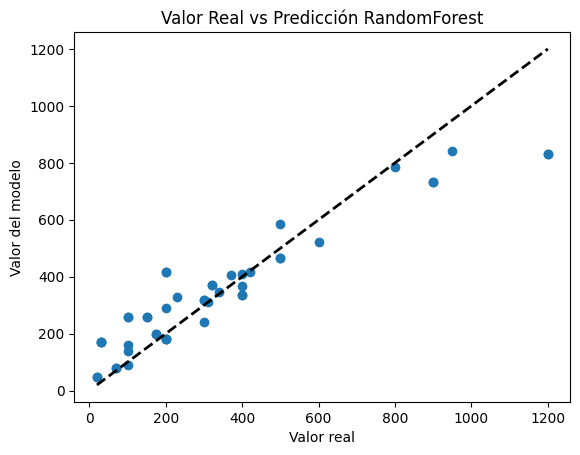

In [ ]:
# Evaluación en el conjunto de prueba

Y_pred = model.predict(X_test) #30%


mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Random Forest']=[mse, rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción RandomForest')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

# **GRID SEARCH**

{'max_depth': None, 'max_samples': 0.8, 'min_samples_leaf': 2, 'n_estimators': 100}
      Random Forest    GridSearch
mse    13764.015446  10214.930913
rmse     117.320141    101.068941
mae       80.686192     69.431568
mape       0.637423      0.483936
max      370.528452    319.160000


<ipython-input-9-cc2bc880249b>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


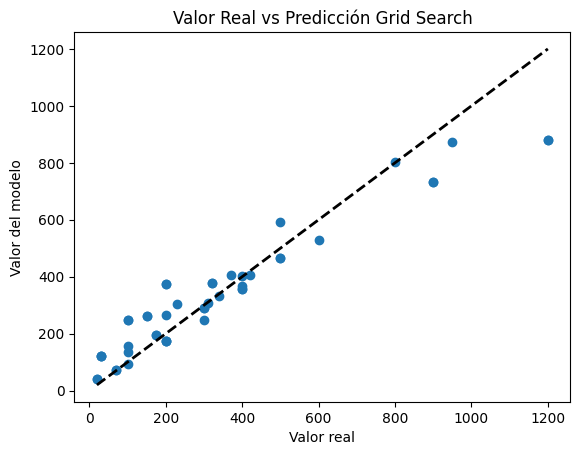

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

# Hiperparámetros para buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 50],
    'min_samples_leaf': [2, 10,50],
    'max_samples':[0.6, 0.7, 0.8],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) #maximiza el scoring
grid_search.fit(X_train, Y_train) #70%

#Mejor Modelo
grid_best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)

#Evaluación del mejor modelo
Y_pred = grid_best_model.predict(X_test) #30%

mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['GridSearch']=[mse, rmse, mae, mape,max]
print(medidas)
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Grid Search')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

# **Random Search**

{'n_estimators': 300, 'min_samples_leaf': 2, 'max_samples': 0.8, 'max_depth': None}
      Random Forest    GridSearch  RandomSearch
mse    13764.015446  10214.930913  10456.479309
rmse     117.320141    101.068941    102.256928
mae       80.686192     69.431568     71.794670
mape       0.637423      0.483936      0.539024
max      370.528452    319.160000    311.945992


<ipython-input-10-12de69e4fb1e>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


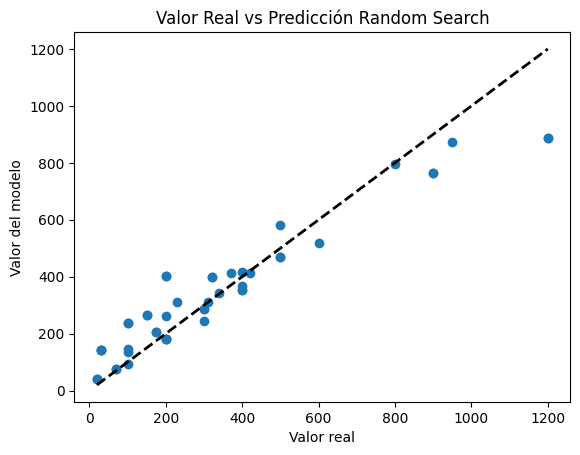

In [ ]:
# Random Search

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 50],
    'min_samples_leaf': [2, 10,50],
    'max_samples':[0.6, 0.7, 0.8],
}


random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, Y_train) #70%

#Mejor modelo
random_best_model = random_search.best_estimator_
best_params = random_search.best_params_
print(best_params)

#Evaluación del mejor modelo
Y_pred = random_best_model.predict(X_test) #30%

mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['RandomSearch']=[mse, rmse, mae, mape,max]
print(medidas)
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Random Search')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

# **Bayes Search**

Maximiza el scoring

https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
from skopt.space import Real, Integer

param_grid = {'max_depth': Integer(2, 500),
              'min_samples_leaf': Integer(2, 100),
              'n_estimators': Integer(100, 300),
              'max_samples': Real(0.5,0.9),
              }

#my_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better=False)



#‘neg_mean_squared_error’ -> metrics.mean_squared_error
# https://scikit-learn.org/stable/modules/model_evaluation.html

OrderedDict([('max_depth', 389), ('max_samples', 0.9), ('min_samples_leaf', 2), ('n_estimators', 100)])
      Random Forest    GridSearch  RandomSearch  BayesSearch
mse    13764.015446  10214.930913  10456.479309  8019.039821
rmse     117.320141    101.068941    102.256928    89.549092
mae       80.686192     69.431568     71.794670    61.587332
mape       0.637423      0.483936      0.539024     0.442946
max      370.528452    319.160000    311.945992   276.452381


<ipython-input-13-34ca717bf863>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


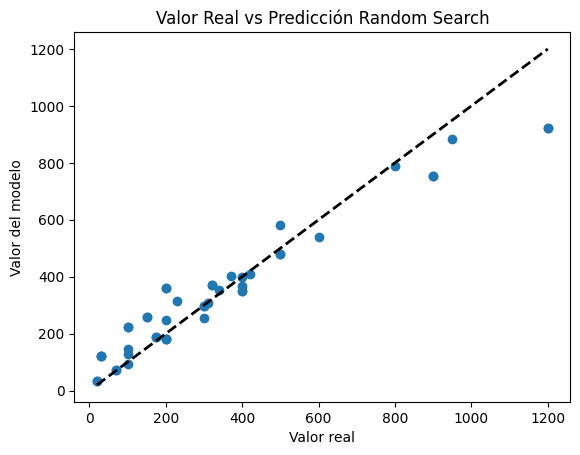

In [ ]:
# BayesSearchCV
from skopt.space import Real, Integer
from skopt import BayesSearchCV

param_grid = {'max_depth': Integer(2, 500),
              'min_samples_leaf': Integer(2, 100),
              'n_estimators': Integer(100, 300),
              'max_samples': Real(0.5,0.9),
              }

bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_grid,
    n_iter=50,       # Número de iteraciones de búsqueda
    cv=5,            # Número de divisiones en la validación cruzada
    n_jobs=-1,        # Utilizar todos los núcleos disponibles
    scoring='neg_mean_absolute_percentage_error', #Se maximiza el scoring
    refit=True #el mejor modelo encontrado durante la búsqueda se vuelve a ajustar (re-entrenar) usando todos los dato
)

# Realizar la búsqueda de hiperparámetros
bayes_search.fit(X_train, Y_train) #70%

#Mejor modelo
bayes_best_model = bayes_search.best_estimator_
best_params = bayes_search.best_params_
print(best_params)

#Evaluación del mejor modelo
Y_pred = bayes_best_model.predict(X_test) #30%

mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['BayesSearch']=[mse, rmse, mae, mape,max]
print(medidas)

#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Random Search')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

# **Algoritmes Genéticos**

https://sklearn-genetic-opt.readthedocs.io/en/stable/api/gasearchcv.html


In [ ]:
!pip install sklearn-genetic-opt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.0 MB/s eta 0:00:00


In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold

param_grid = {'max_depth': Integer(2, 500),
              'min_samples_leaf': Integer(2, 100),
              'n_estimators': Integer(100, 300),
              'max_samples': Continuous(0.5, 0.9),
              }

evolved_estimator = GASearchCV(estimator=model,
                               cv=3, #10
                               scoring='neg_mean_squared_error', #maximiza scoring
                               population_size=20, #tamaño de la población es constante
                               generations=35, #generaciones o iteraciones
                               elitism=True, #selección de padres
                               crossover_probability=0.4, #porcentaje para hacer recombinación
                               mutation_probability=0.6, #porcentaje de mutación
                               param_grid=param_grid,
                               criteria='max',
                               verbose=True)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	20    	-84931 	8882.89    	-57058.8   	-88270.4   
1  	40    	-78549.5	14046.2    	-45781.5   	-88135.5   
2  	40    	-62024.3	15005.2    	-44750     	-87870.4   
3  	40    	-50478.7	4828.49    	-43284.5   	-57058.8   
4  	40    	-46443.9	5330.59    	-39673.5   	-56864     
5  	40    	-41580.1	3332.48    	-38533     	-53684.9   
6  	40    	-39418.7	990.762    	-38498.5   	-41095.6   
7  	40    	-39070.6	778.221    	-38498.5   	-41095.6   
8  	40    	-38673.6	426.563    	-38147.2   	-40322.9   
9  	40    	-38353.6	216.449    	-38147.2   	-38759.9   
10 	40    	-38199.1	129.208    	-38087.8   	-38498.5   
11 	40    	-38160.5	113.485    	-37998     	-38498.5   
12 	40    	-38158.2	197.358    	-37998     	-38905     
13 	40    	-38066.6	50.5055    	-37998     	-38147.2   
14 	40    	-38055.8	45.161     	-37998     	-38147.2   
15 	40    	-38042  	75.2563    	-37972.8   	-38298.2   
16 	40    	-38031.7	95.2386    	-37919.2   	-38292

<ipython-input-16-e4a00d8ff261>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)


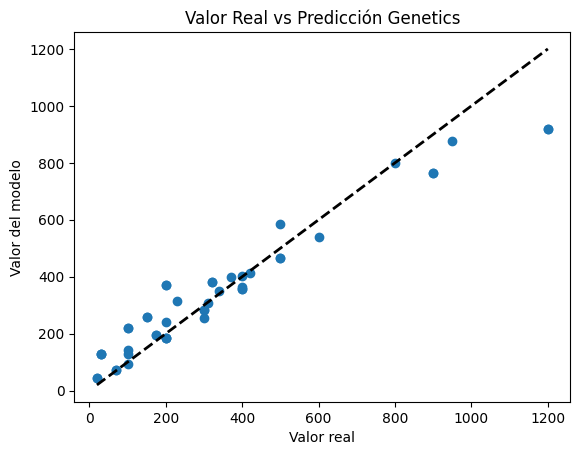

In [ ]:
#Aprendizaje
evolved_estimator.fit(X_train,Y_train) #70%

#Mejor modelo
best_params= evolved_estimator.best_params_
genetics_best_model= evolved_estimator.best_estimator_
print(best_params)

#Evaluación
Y_pred= genetics_best_model.predict(X_test) #30%

mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
mae= metrics.mean_absolute_error(Y_test,Y_pred)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)
max=metrics.max_error(Y_test,Y_pred)
medidas['Genetics']=[mse, rmse, mae, mape,max]
print(medidas)
#Gráfica Valor Real vs Predicción
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],'k--', color = 'black', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor del modelo')
plt.title('Valor Real vs Predicción Genetics')
plt.show() # Mostrar la grafica luego de que ya se definio todos los elementos

/usr/local/lib/python3.11/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


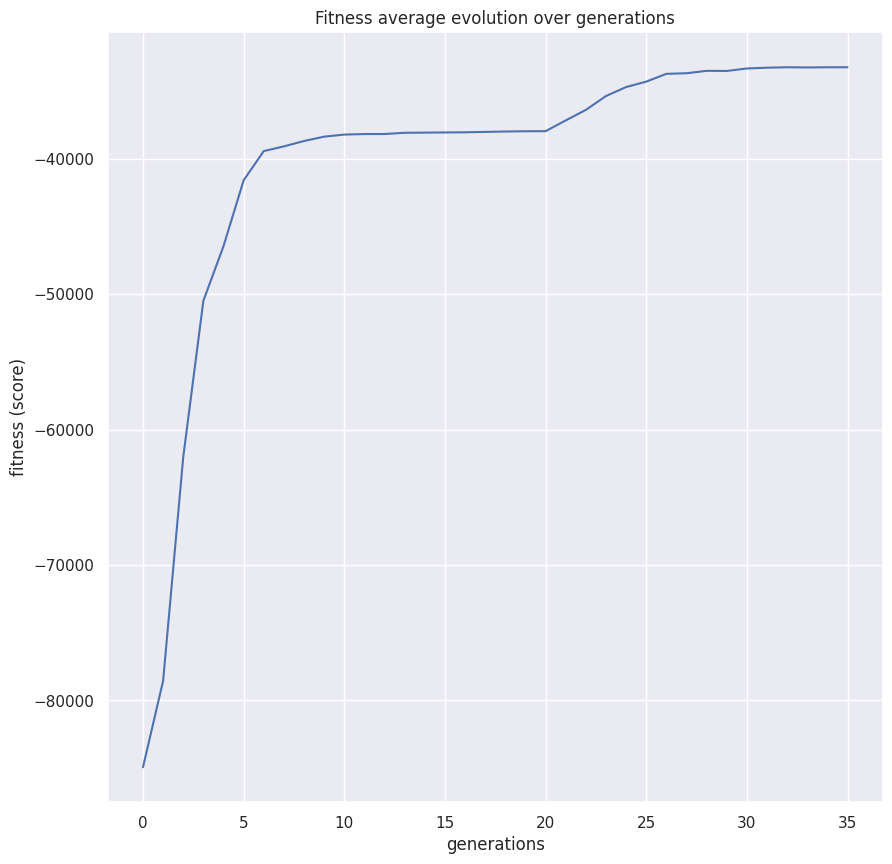

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

# Se entrena mejor modelo con todos los datos

In [ ]:
# Se entrena la mejor configuración con todos los datos
genetics_best_model.fit(X,Y)

RandomForestRegressor(max_depth=146, max_samples=np.float64(0.8814409735426818),
                      min_samples_leaf=2, n_estimators=122, random_state=42)

In [ ]:
# Se guarda el modelo para despliegue

